### 워드클라우드

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from collections import Counter
import itertools
from khaiii import KhaiiiApi

#### 데이터 로드

In [ ]:
data_df = pd.read_excel('/content/21년 주관식(강점보완점) 자유의견 data_정리 (1).xlsx',engine='openpyxl')

In [ ]:
data_df.head()

,KnoxID,문항구분,답변내용
0,a72mnt.joo,강점,팀장님으로부터 부여된 업무에 대해서 의도와 방향을 명확하게 파악하고 팀원들에게 제시...
1,a72mnt.joo,보완점,"m 기술팀에 많은 그룹장 중에 가장 합리적인 업무를 진행하고 있어, 추가 요청사항 ..."
2,aaron.hwang,강점,기존에 겪어왔던 리더들보다 기술적 스킬도 높고 상대를 배려주면서 업무 전달 및 피드...
3,aaron.hwang,보완점,파트 원간의 소통이 좀 부족한 것 같습니다.\n자발적이고 적극적인 태도와 열정이 부...
4,abcd432.um,강점,"직장님으로써 운영의 고충을 들어주시고, 먼저 나서서 제안과 방안 등을 알려주십니다...."


In [ ]:
print('데이터의 수:',len(data_df))

데이터의 수: 10089


In [ ]:
strength_data = data_df[data_df['문항구분'] == '강점']
weakness_data = data_df[data_df['문항구분'] == '보완점']

#### 단어 분절 (khaiii)

##### 특수기호 제거

In [ ]:
p = re.compile('[^a-zA-Z0-9ㄱ-힗]')
# 위의 패턴 문자열의 매칭되는 문자는 아래 코드를 통해서 빈공백으로 치환할 것이다.

# 문장의 특수기호 제거 함수
def remove_special_characters(sentence, lower=True):
    sentence = p.sub(' ', sentence) # 패턴 객체로 sentence 내의 특수기호를 공백문자로 치환한다.
    sentence = ' '.join(sentence.split()) # sentence 내의 두개 이상 연속된 빈공백들을 하나의 빈공백으로 만든다.
    sentence = sentence.lower()
    return sentence

In [ ]:
# NNG: 일반명사, NNP:고유명사, SL: 외국어, SH:한자, SN:숫자, VV:동사, VA:형용사
khaiii = KhaiiiApi()
stopwords = # ['소통','같다','되다','위하다','있다','하다','대하다','좋다','없다','많다','업무','부서원'] #['대하다','때','하다','있다','없다']

def stemming_func(sentence):
    filter = ['NNG', 'NNP','SL', 'SH','SN','VV','VA','MM'] # 사용할 품사
    tokenized_khaiii = []
    sentence = remove_special_characters(sentence)
    tokenized_sentence = khaiii.analyze(sentence) # khaiii로 분절
    for words in tokenized_sentence:
        for morph in words.morphs:
            if morph.tag in filter:
                if morph.tag =='VA' or morph.tag == 'VV': # 동사나 형용사면 +'다'를 한다
                    tokenized_khaiii.append(morph.lex+'다')
                else:
                    tokenized_khaiii.append(morph.lex)
    stopwords_removed_sentence = [word for word in tokenized_khaiii if not word in stopwords]

    return stopwords_removed_sentence

In [ ]:
strength_data['분절결과'] = strength_data['답변내용'].map(stemming_func)
weakness_data['분절결과'] = weakness_data['답변내용'].map(stemming_func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 동의어 사전 만들기 


현재 가지고 있는 데이터에서 중복을 제거한 단어의 수를 파악한 다음 이 정도의 크기에 해당하는 단어들을 우리말샘에서 크롤링하고 동의어 사전을 구축합니다. 

In [ ]:
s_token_list = list(strength_data['분절결과'])
s_token_list =sum(s_token_list,[]) # 리스트 내부 리스트 합치기

In [ ]:
w_token_list = list(weakness_data['분절결과'])
w_token_list =sum(w_token_list,[]) # 리스트 내부 리스트 합치기

In [ ]:
from collections import Counter
import itertools
from wordcloud import WordCloud

In [ ]:
s_count = Counter(s_token_list) # 토큰수 카운트
s_Word = dict(s_count.most_common())

w_count = Counter(w_token_list)
w_Word = dict(w_count.most_common())

In [ ]:
s_Word_dict = {key: value for key, value in s_Word.items() if value >=5}
w_Word_dict = {key: value for key, value in w_Word.items() if value >=5}

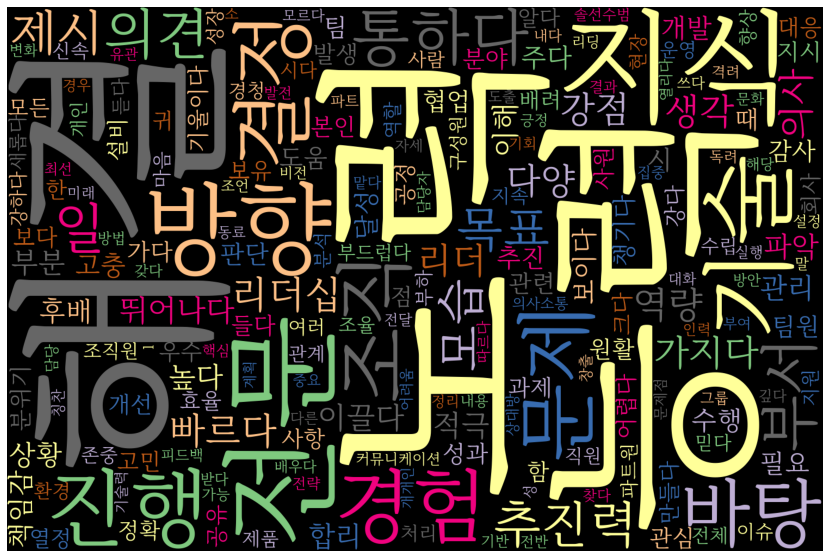

In [ ]:
s_wordcloud = WordCloud(font_path='/content/MaruBuri-Regular.ttf', # 강점
                                    background_color='black',
                                    colormap="Accent_r",
                                    width=1500, height=1000).generate_from_frequencies(s_Word_dict)
plt.figure(figsize=(15,10))
plt.imshow(s_wordcloud)
plt.axis("off")
plt.show()

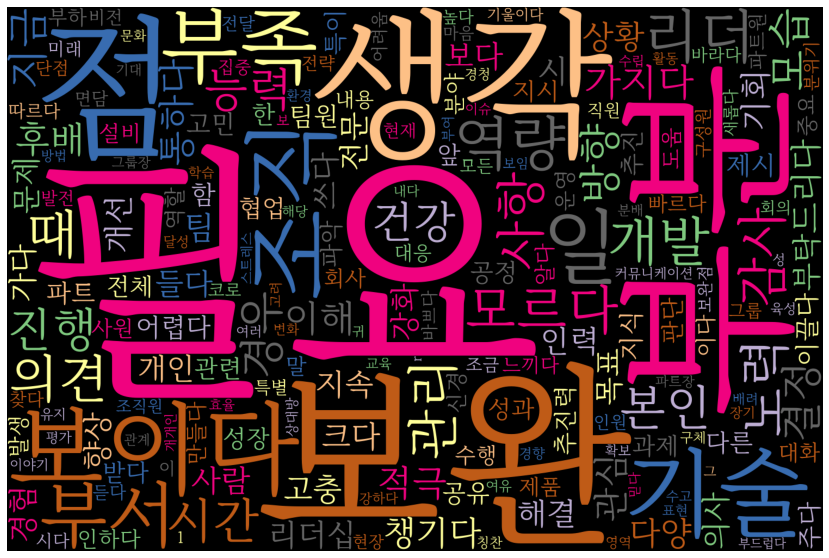

In [ ]:
w_wordcloud = WordCloud(font_path='/content/MaruBuri-Regular.ttf', # 약점
                                    background_color='black',
                                    colormap="Accent_r",
                                    width=1500, height=1000).generate_from_frequencies(w_Word_dict)
plt.figure(figsize=(15,10))
plt.imshow(w_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
print(weakness_data[['답변내용','분절결과']].iloc[200][0])
print(weakness_data[['답변내용','분절결과']].iloc[200][1])

많은 업무로 인해 너무 바빠 보이세요
후배 사원의 고충을 들을 수 있는 시간을 충분히 갖지 못하고 있다
design rule에 대한 성격상 innovation이 어려운 점을 잘 이해합니다. 그럼에도 불구하고, 해마다 새로운 도전으로 지속 발전하는 design rule이 되도록 하는 노력이 필요할듯합니다.
부서 및 부서원들의 장기적인 발전을 위한 업무 방향이 설정되었으면 합니다.
팀원들의 구체적인 career plan에 대한 면담이 이뤄지면 좋겠습니다.
없습니다
딱히 보이지 않습니다
감사합니다
잘 모름
더하려고 하는 의지가 있고 여건만 더 주어진다면 보다 더 나은 성과를 낼 것으로 보이나 인력, 업무 상황 등 어려운 조건으로 인해 고군분투하는 게 안타까움
제 자신이 아직 부족한 면이 많기에 진단 대상자의 보완점을 찾기 어려운 것 같습니다.
팀원들의 의견을 대변하지만 전체 프로젝트 진행이 어려워질 수 있음.
['인하다', '바쁘다', '보이다', '후배', '사원', '고충', '듣다', '시간', '갖다', 'design', 'rule', '성격', 'innovation', '어렵다', '점', '이해', '그렇다', '해', '새롭다', '도전', '지속', '발전', 'design', 'rule', '노력', '필요', '부서', '장기', '발전', '방향', '설정', '팀원', '구체', 'career', 'plan', '면담', '이루어지다', '보이다', '감사', '모름', '의지', '여건', '주어지다', '낫다', '성과', '내다', '보이다', '인력', '상황', '어렵다', '조건', '인하다', '고', '군', '분투', '안타깝다', '자신', '부족', '면', '진단', '대상자', '보완점', '찾다', '어렵다', '팀원', '의견', '대변', '전체', '프로젝트', '진행', '어렵다']


In [ ]:
print(weakness_data[['답변내용','분절결과']].iloc[200][0])
print(weakness_data[['답변내용','분절결과']].iloc[200][1])

많은 업무로 인해 너무 바빠 보이세요
후배 사원의 고충을 들을 수 있는 시간을 충분히 갖지 못하고 있다
design rule에 대한 성격상 innovation이 어려운 점을 잘 이해합니다. 그럼에도 불구하고, 해마다 새로운 도전으로 지속 발전하는 design rule이 되도록 하는 노력이 필요할듯합니다.
부서 및 부서원들의 장기적인 발전을 위한 업무 방향이 설정되었으면 합니다.
팀원들의 구체적인 career plan에 대한 면담이 이뤄지면 좋겠습니다.
없습니다
딱히 보이지 않습니다
감사합니다
잘 모름
더하려고 하는 의지가 있고 여건만 더 주어진다면 보다 더 나은 성과를 낼 것으로 보이나 인력, 업무 상황 등 어려운 조건으로 인해 고군분투하는 게 안타까움
제 자신이 아직 부족한 면이 많기에 진단 대상자의 보완점을 찾기 어려운 것 같습니다.
팀원들의 의견을 대변하지만 전체 프로젝트 진행이 어려워질 수 있음.
['인하다', '바쁘다', '보이다', '후배', '사원', '고충', '듣다', '시간', '갖다', 'design', 'rule', '성격', 'innovation', '어렵다', '점', '이해', '그렇다', '해', '새롭다', '도전', '지속', '발전', 'design', 'rule', '노력', '필요', '부서', '장기', '발전', '방향', '설정', '팀원', '구체', 'career', 'plan', '면담', '이루어지다', '보이다', '감사', '모름', '의지', '여건', '주어지다', '낫다', '성과', '내다', '보이다', '인력', '상황', '어렵다', '조건', '인하다', '고', '군', '분투', '안타깝다', '자신', '부족', '면', '진단', '대상자', '보완점', '찾다', '어렵다', '팀원', '의견', '대변', '전체', '프로젝트', '진행', '어렵다']


#### 개인별 워드 카운트

In [ ]:
from collections import Counter

strength_data['토큰 카운트'] = strength_data['분절결과'].map(Counter)
strength_data['토큰 카운트'] = strength_data['토큰 카운트'].map(Counter.most_common)
strength_data['토큰 카운트']= strength_data['토큰 카운트'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
st_dict=strength_data['토큰 카운트'].iloc[2]

In [ ]:
s_Word_dict = {key: value for key, value in st_dict.items() if value >=0}

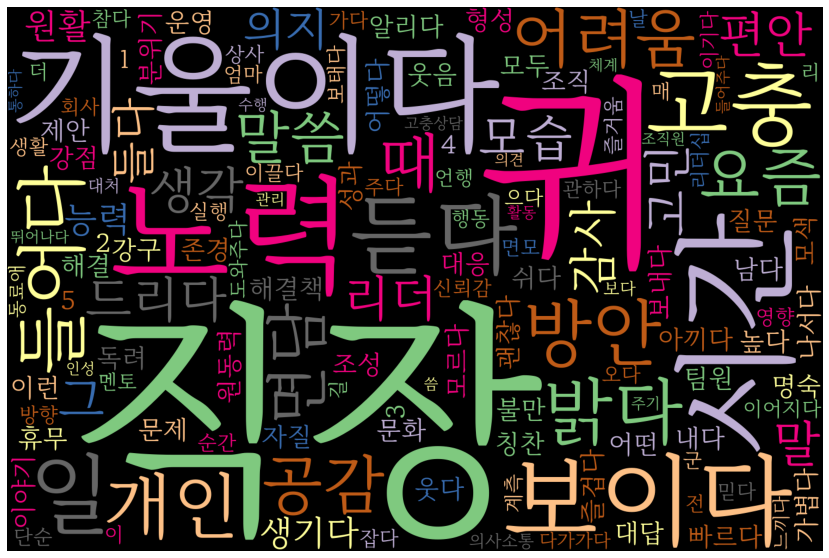

In [ ]:
s_wordcloud = WordCloud(font_path='/content/MaruBuri-Regular.ttf', # 강점
                                    background_color='black',
                                    colormap="Accent_r",
                                    width=1500, height=1000).generate_from_frequencies(s_Word_dict)
plt.figure(figsize=(15,10))
plt.imshow(s_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
strength_data.head()

,KnoxID,문항구분,답변내용,분절결과,토큰 카운트
0,a72mnt.joo,강점,팀장님으로부터 부여된 업무에 대해서 의도와 방향을 명확하게 파악하고 팀원들에게 제시...,"[팀장, 부여, 의도, 방향, 파악, 팀원, 제시, 전달, 각자, 포지션, 능력, ...","{'환경': 6, '능력': 5, '안전': 5, '통하다': 4, '뛰어나다': ..."
2,aaron.hwang,강점,기존에 겪어왔던 리더들보다 기술적 스킬도 높고 상대를 배려주면서 업무 전달 및 피드...,"[기존, 겪다, 리더, 기술, 스다, 킬, 높다, 상대, 배리다, 전달, 백, 면,...","{'해결': 4, '전달': 3, '문제': 3, '결정': 3, '지식': 3, ..."
4,abcd432.um,강점,"직장님으로써 운영의 고충을 들어주시고, 먼저 나서서 제안과 방안 등을 알려주십니다....","[직장, 운영, 고충, 들어다, 나서다, 제안, 방안, 알리다, 문제, 빠르다, 대...","{'직장': 6, '귀': 4, '기울이다': 4, '노력': 4, '시간': 4,..."
6,achilles,강점,시황 변화를 업무와 연관 지어 미래 전략을 전망하는 scope 가 정말 탁월합니다....,"[시황, 변화, 연관, 짓다, 미래, 전략, 전망, scope, 가다, 해당, 지식...","{'방향': 4, '지식': 3, '추진력': 3, '부서': 3, '통하다': 3..."
8,adh5281,강점,"오랜 경험과 지식으로 문제에 대한 해결을 제시할 수 있고, 후배들에게 업무를 잘 배...","[오랜, 경험, 지식, 문제, 해결, 제시, 후배, 배분, 화, 성정, 엔지니어, ...","{'경험': 3, '지식': 3, '후배': 3, '능력': 3, '제시': 2, ..."


In [ ]:
weakness_data.head()

,KnoxID,문항구분,답변내용,분절결과,토큰 카운트
1,a72mnt.joo,보완점,"m 기술팀에 많은 그룹장 중에 가장 합리적인 업무를 진행하고 있어, 추가 요청사항 ...","[m, 기술, 팀, 그룹장, 합리, 진행, 추가, 요청, 사항, 운동, 부족, 고집...","{'필요': 3, '기술': 2, '진행': 2, '전문': 2, '쓰다': 2, ..."
3,aaron.hwang,보완점,파트 원간의 소통이 좀 부족한 것 같습니다.\n자발적이고 적극적인 태도와 열정이 부...,"[파, 트, 원간, 부족, 자발, 적극, 태도, 열정, 부족, 경험, 통하다, 능력...","{'부족': 2, '보완점': 2, '파': 1, '트': 1, '원간': 1, '..."
5,abcd432.um,보완점,지금 처음 팀원들의 고충과 말에 귀 기울여 주세요 지금의 자리가 많이 부담스럽고 힘...,"[처음, 팀원, 고충, 말, 귀, 기울이다, 지금, 자리, 부담, 들다, 자리, 알...","{'만들다': 4, '길': 3, '자리': 2, '처음': 1, '팀원': 1, ..."
7,achilles,보완점,생산기획 루프의 업무 r&r에 대해 goc 레벨 감안하여 어떻게 to be 모델을 ...,"[생산, 기획, 루프, r, r, goc, 레벨, 감안, 어떻다, to, be, 모...","{'필요': 3, '노력': 3, 'r': 2, '강화': 2, '리더십': 2, ..."
9,adh5281,보완점,"새로운 project 추진 시에는 적극적인 도전이 필요한데, 강한 도전 전신이 필요...","[새롭다, project, 추진, 시, 적극, 도전, 필요, 도전, 전신, 필요, ...","{'필요': 4, '개발': 3, '새롭다': 2, '도전': 2, '차세대': 2..."


In [ ]:
temp_1 = list(strength_data['분절결과'])

In [ ]:
def mk_json(*args , ):
  token_list = args
  sentence_list = []

  for sentence in token_list:
    token = Counter(sentence)
    token_dict = dict(token.most_common())
    sorted(token_dict.items(), key=lambda x :x[1], reverse=True)
    sentence_list.append(token_dict)
  

### 함수화

In [ ]:
strength_list = []
for i in temp_1:
  st_token = Counter(i)
  st_dict = dict(st_token.most_common())
  strength_list.append(st_dict)

In [ ]:
strength_list_2 = []
for j in strength_list:
  temp = sorted(j.items(), key=lambda x:x[1],reverse=True)
  strength_list_2.append(temp)

In [ ]:
temp_id = list(strength_data['KnoxID'])

In [ ]:
dict_strenght = dict(zip(temp_id,strength_list_2))

In [ ]:
import json

with open('/content/json_file/s_json.json','w',encoding='UTF-8-sig') as f:
  f.write(json.dumps(dict_strenght, ensure_ascii=False))

In [ ]:
strength_data.head()

,KnoxID,문항구분,답변내용,분절결과,토큰 카운트
0,a72mnt.joo,강점,팀장님으로부터 부여된 업무에 대해서 의도와 방향을 명확하게 파악하고 팀원들에게 제시...,"[팀장, 부여, 의도, 방향, 파악, 팀원, 제시, 전달, 각자, 포지션, 능력, ...","{'환경': 6, '능력': 5, '안전': 5, '통하다': 4, '뛰어나다': ..."
2,aaron.hwang,강점,기존에 겪어왔던 리더들보다 기술적 스킬도 높고 상대를 배려주면서 업무 전달 및 피드...,"[기존, 겪다, 리더, 기술, 스다, 킬, 높다, 상대, 배리다, 전달, 백, 면,...","{'해결': 4, '전달': 3, '문제': 3, '결정': 3, '지식': 3, ..."
4,abcd432.um,강점,"직장님으로써 운영의 고충을 들어주시고, 먼저 나서서 제안과 방안 등을 알려주십니다....","[직장, 운영, 고충, 들어다, 나서다, 제안, 방안, 알리다, 문제, 빠르다, 대...","{'직장': 6, '귀': 4, '기울이다': 4, '노력': 4, '시간': 4,..."
6,achilles,강점,시황 변화를 업무와 연관 지어 미래 전략을 전망하는 scope 가 정말 탁월합니다....,"[시황, 변화, 연관, 짓다, 미래, 전략, 전망, scope, 가다, 해당, 지식...","{'방향': 4, '지식': 3, '추진력': 3, '부서': 3, '통하다': 3..."
8,adh5281,강점,"오랜 경험과 지식으로 문제에 대한 해결을 제시할 수 있고, 후배들에게 업무를 잘 배...","[오랜, 경험, 지식, 문제, 해결, 제시, 후배, 배분, 화, 성정, 엔지니어, ...","{'경험': 3, '지식': 3, '후배': 3, '능력': 3, '제시': 2, ..."


### 보완점

In [ ]:
weakness_data['토큰 카운트'] = weakness_data['분절결과'].map(Counter)
weakness_data['토큰 카운트'] = weakness_data['토큰 카운트'].map(Counter.most_common)
weakness_data['토큰 카운트']= weakness_data['토큰 카운트'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
w_dict=weakness_data['토큰 카운트'].iloc[2]

In [ ]:
w_Word_dict = {key: value for key, value in w_dict.items() if value >=0}

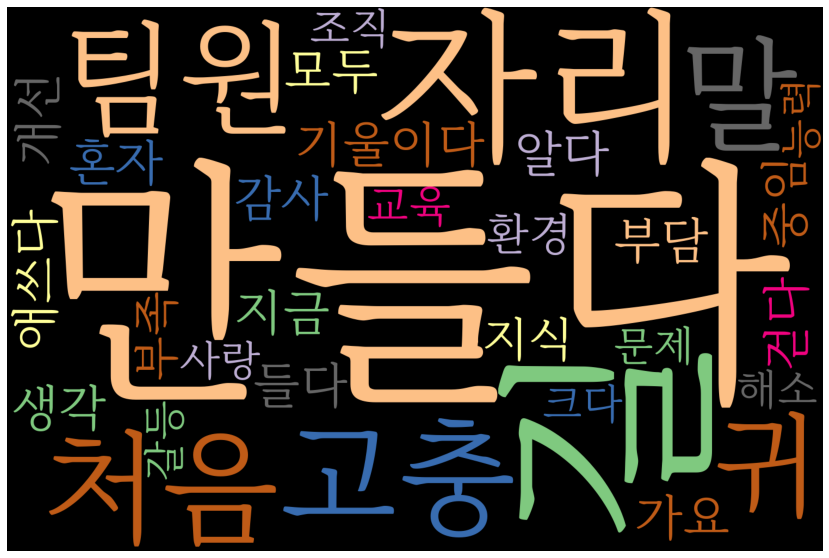

In [ ]:
w_wordcloud = WordCloud(font_path='/content/MaruBuri-Regular.ttf', # 약점
                                    background_color='black',
                                    colormap="Accent_r",
                                    width=1500, height=1000).generate_from_frequencies(w_Word_dict)
plt.figure(figsize=(15,10))
plt.imshow(w_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
temp_2 = list(weakness_data['분절결과'])

In [ ]:
weakness_list = []
for i in temp_2:
  w_token = Counter(i)
  w_dict = dict(w_token.most_common())
  weakness_list.append(w_dict)

In [ ]:
weakness_list_2 = []
for j in weakness_list:
  temp = sorted(j.items(), key=lambda x:x[1],reverse=True)
  weakness_list_2.append(temp)

In [ ]:
temp_id_2 = list(weakness_data['KnoxID'])

In [ ]:
dict_weakness = dict(zip(temp_id_2,weakness_list_2))

In [ ]:
with open('/content/json_file/w_json.json','w',encoding='UTF-8-sig') as f:
  f.write(json.dumps(dict_weakness, ensure_ascii=False))

In [ ]:
weakness_data[['KnoxID','토큰 카운트']].head()

,KnoxID,토큰 카운트
1,a72mnt.joo,"{'필요': 3, '기술': 2, '진행': 2, '전문': 2, '쓰다': 2, ..."
3,aaron.hwang,"{'부족': 2, '보완점': 2, '파': 1, '트': 1, '원간': 1, '..."
5,abcd432.um,"{'만들다': 4, '길': 3, '자리': 2, '처음': 1, '팀원': 1, ..."
7,achilles,"{'필요': 3, '노력': 3, 'r': 2, '강화': 2, '리더십': 2, ..."
9,adh5281,"{'필요': 4, '개발': 3, '새롭다': 2, '도전': 2, '차세대': 2..."


In [ ]:
dict_weakness

{'a72mnt.joo': [('필요', 3),
  ('기술', 2),
  ('진행', 2),
  ('전문', 2),
  ('쓰다', 2),
  ('생각', 2),
  ('건강', 2),
  ('m', 1),
  ('팀', 1),
  ('그룹장', 1),
  ('합리', 1),
  ('추가', 1),
  ('요청', 1),
  ('사항', 1),
  ('운동', 1),
  ('부족', 1),
  ('고집', 1),
  ('권한', 1),
  ('이임', 1),
  ('통하다', 1),
  ('후임', 1),
  ('역량', 1),
  ('강화', 1),
  ('global', 1),
  ('business', 1),
  ('skill', 1),
  ('상대방', 1),
  ('이해', 1),
  ('경청', 1),
  ('관심', 1),
  ('인원', 1),
  ('관리', 1),
  ('욕심', 1),
  ('가지다', 1),
  ('인력', 1),
  ('양성', 1),
  ('확장', 1),
  ('공정', 1),
  ('설비', 1),
  ('전반', 1),
  ('학습', 1),
  ('기술력', 1),
  ('자격증', 1),
  ('갖추다', 1),
  ('공부', 1),
  ('기획', 1),
  ('추진력', 1),
  ('지시', 1),
  ('시', 1),
  ('자신', 1),
  ('밀어붙이다', 1),
  ('음', 1),
  ('건강관리', 1),
  ('신경', 1),
  ('일', 1),
  ('우선', 1),
  ('악영향', 1),
  ('끼치다', 1),
  ('모습', 1),
  ('지켜보다', 1),
  ('챙기다', 1),
  ('바라다', 1),
  ('부분', 1),
  ('이야기', 1),
  ('팀원', 1),
  ('자랑', 1),
  ('생활', 1),
  ('정확', 1),
  ('만족', 1),
  ('회의', 1),
  ('길다', 1),
  ('경향', 1)],
 'aaron.hwang': [('부족